# Chapter 09 **비지도 학습**

비지도 학습을 하는 이유  
  
: 레이블이 주어지지 않은 데이터에 대해서 알고리즘이 학습하기 위함.

## **비지도 학습의 종류**

- **<h5>군집 Clustering</h5>**
  : 비슷한 샘플을 군집화  
  
    Ex) 데이터 분석, 고객 분류, 이미지 분할, 차원 축소 등
  

- **<h5>이상치 탐지 Outlier detection</h5>**
: 정상데이터에 대해 비정상 샘플을 감지

  Ex) 제조 라인 결함 제품 감지, 시계열 데이터 새로운 트렌드 찾기

- **<h5>밀도 추정 Density estimation</h5>**
: 데이터셋 생성 확률 과정의 확률 밀도 함수 추정

    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;=> 밀도가 매우 낮은 영역에 놓인 샘플을 이상치라 판단 가능.

  Ex) 데이터 분석, 시각화 유용

## **9.1 군집 Clustering**

비슷한 샘플을 구별해 하나의 Cluster 또는 비슷한 샘플의 그룹으로 할당하는 작업

- 분류와 군집의 차이

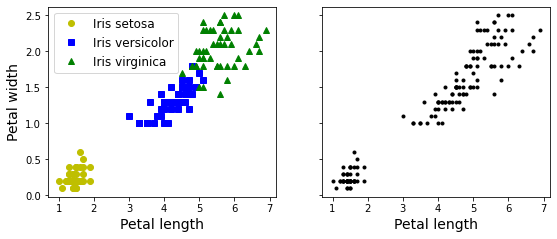

           레이블이 있는 경우 vs 레이블이 없는 경우

##### **군집을 활용한 Application**

- **고객 분류**

  구매 이력, 웹사이트 내 행동 기반 등으로 Clustering, 고객 그룹 마다의 추천 시스템 적용 가능  
- **데이터 분석**

  새로운 데이터셋을 분석 시 Clustering 후 각 군집을 따로 분석
- **차원 축소 기법**

  각 샘플의 특성 벡터를 Cluster 친화성의 벡터로 바꾸어 차원 축소

  *친화성 : 샘플이 군집에 잘 맞는 정도
- **이상치 탐지**

  모든 클러스터에 친화성이 낮은 샘플 탐지 (이상치일 가능성 높음).

  웹사이트 내 행동 기반 클러스터 => 초당 웹서버 요청을 비정상적으로 많이 하는 사용자(이상치) 감지.

  제조 분야 결함 감지, 부정 거래 감지 등
- **준지도 학습**

  레이블이 있는 샘플이 적다면 Clustering 수행, 동일한 군집에 있는 모든 샘플에 레이블을 전파를 통해 지도 학습 수행 가능, 성능 향상.
- **검색 엔진**

  데이터 베이스에 모든 이미지에 Clustering 적용. 제시된 이미지와 비슷한 이미지의 군집을 찾아 해당 군집의 모든 이미지 반환
- **이미지 분할**

  색을 기반으로 픽셀 Clustering, 각 픽셀의 색을 해당 군집의 평균 색으로 변환.

  => 이미지에 색상 종류 감소
  
  => 물체의 윤곽 감지 원활

  => 물체 탐지 및 추적 시스템 사용에 적합



#### **9.1.1 K-평균**

각 군집의 중심을 찾고 가장 가까운 군집에 샘플을 할당

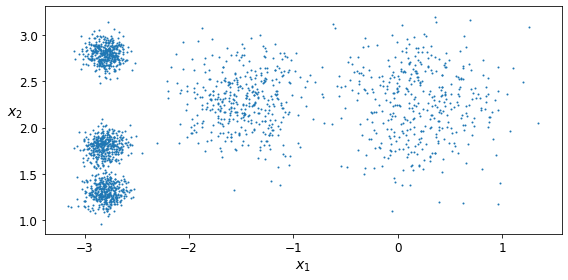

샘플 덩어리 다섯 개로 이루어진 레이블 없는 데이터셋

##### **K-평균 알고리즘**

In [ ]:
from sklearn.cluster import KMeans

k = 5                            # 알고리즘이 찾을 군집의 개수 k 지정

kmeans = KMeans(n_clusters=k)    # 모델 생성

kmeans.fit(X)     # X 데이터셋에 대한 군집화 훈련

pred = kmeans.predict(X)      # X 데이터셋 예측

pred 
# 각 샘플은 다섯 개의 군집 중 하나에 할당
# 할당된 레이블은 알고리즘이 지정한 군집의 인덱스

array([1, 4, 2, ..., 3, 2, 4], dtype=int32)

In [ ]:
# 알고리즘이 찾은 센트로이드
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

In [ ]:
# 새로운 샘플 군집 할당
X_new = np.array([[0, 2],[3,2],[-3,3],[-3,2.5]])
kmeans.predict(X_new)

array([2, 2, 3, 3], dtype=int32)

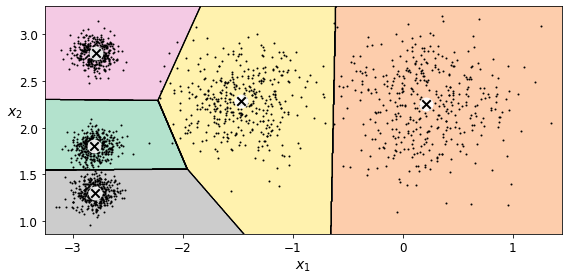

K-평균의 결정 경계 (**보로노이 다이어그램**)   * x표시 - 각 군집의 Centroid

- 몇몇 샘플의 레이블이 잘못 부여되어 있는 것을 알 수 있음

- 군집의 크기가 많이 다를 시 잘 작동 X

##### **Hard, Soft Clustering**

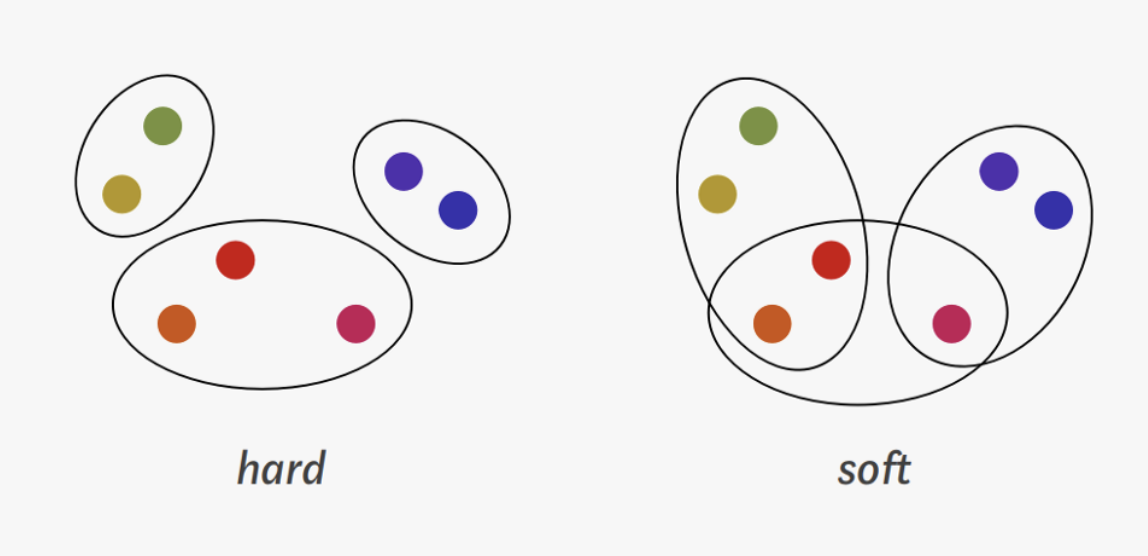

Hard Clustering - 샘플 하나가 하나의 군집에 지정

Ex) K-Means 알고리즘<br><br>

Soft Clustering - 샘플 하나가 다수의 군집에 지정. 각 군집에 속한 정도를 나타내는 수치

 (이때, 수치는 샘플과 센트로이드 사이의 거리 또는 유사도 점수 등이 될 수 있음.)

Ex) Fuzzy C-Means 알고리즘

\#출처 - https://sosoeasy.tistory.com/243

##### **K-평균 알고리즘의 작동 방식**

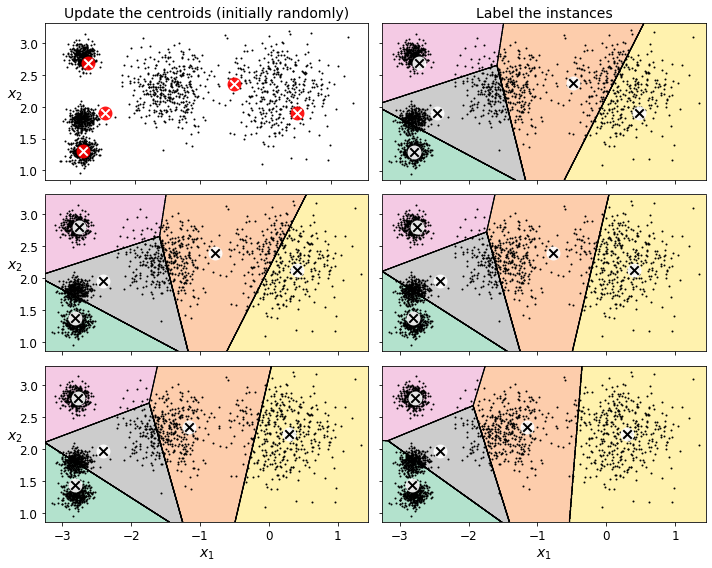

1. 랜덤하게 센트로이드 선정
2. 샘플에 레이블 할당,  센트로이드 업데이트
3. 센트로이드에 변화가 없을 때까지 1과 2 반복

##### **최적이 아닌 솔루션**

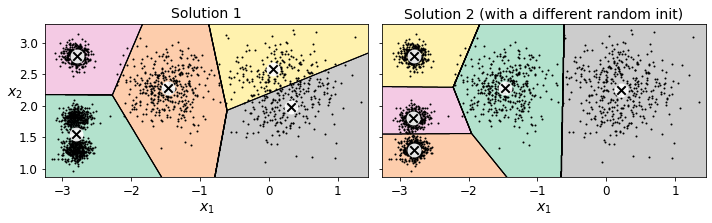

##### **센트로이드 초기화 방법**

In [ ]:
# 1. 또 다른 군집 알고리즘을 먼저 실행하여 최적의 센트로이드 위치를 지정

good_init = np.array([[-3, 3], [-3,2], [-3,1], [-1,2], [0,2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)     # init 매개변수에 지정

In [ ]:
# 2. 랜덤 초기화를 다르게 해 알고리즘을 여러번 실행 후 최적의 솔루션 선택

kmeans = KMeans(n_clusters = 5, n_init=15)    # n_init은 fit() 호출 시 전체 알고리즘의 반복 횟수

##### **최선의 솔루션을 위한 성능 지표**

- 이너셔 Inertia

  : 각 샘플과 가장 가까운 센트로이드 사이의 평균 제곱 거리

  <br>
  모델은 알고리즘을 n_init번 실행 후 이너셔가 가장 낮은 모델 반환

##### **미니배치를 이용한 K-평균**

전체 데이터셋을 사용하지 않고 미니배치를 사용해 센트로이드를 조금씩 이동
<br><br>
장점 - 알고리즘의 속도 3 ~ 4배 향상, 대량 데이터셋에 대해 군집 알고리즘 적용 가능

단점 - 일반적으로 이너셔가 더 높음

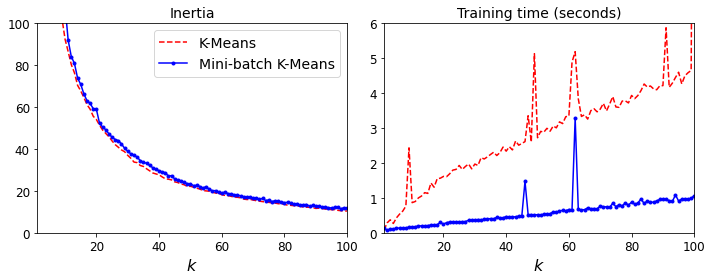

##### **최적의 군집 개수 찾기**

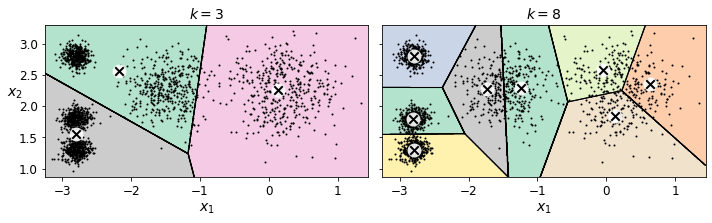

k가 너무 작을 시 별개의 군집을 합침

k가 너무 클 시 하나의 군집이 여러 개로 나뉨

1. 가장 작은 이너셔 모델 선택? (X)

  => 이너셔는 k, 즉 군집의 개수가 증가할 수록 점점 작아지므로 이너셔를 통한 판단 X

2. 엘보를 통한 판단? (**△**)

  이너셔의 변화가 크게 줄어드는 구간 선택

  => k에 대한 정답을 모른다면 좋은 선택이 될 수 있음


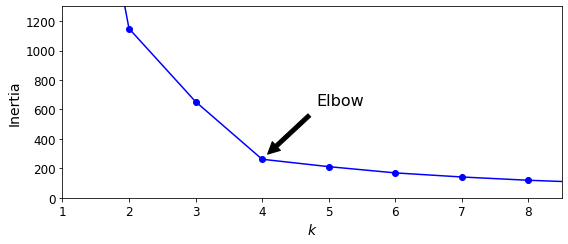

3. 실루엣 점수

  모든 샘플에 대한 실루엣 계수의 평균
  <br>
  *실루엣 계수 (b−a)/max(a,b)

  b - 자신의 군집 제외, 가장 가까운 군집의 샘플까지의 평균 거리

  a - 자신의 군집 내의 평균 거리

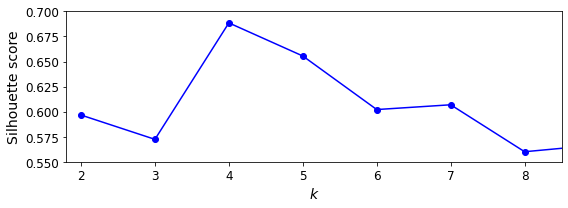

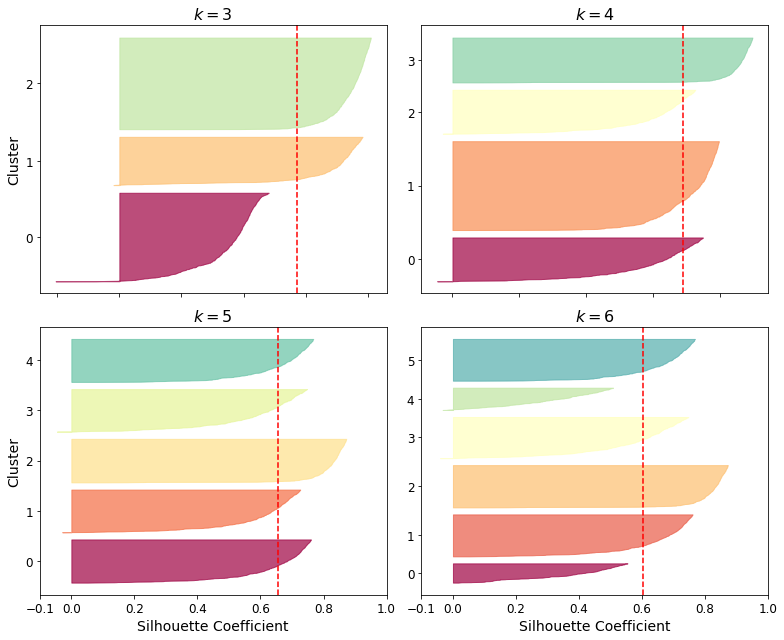

k=5일 때 모든 군집의 크기가 비슷하기 때문에 5를 선택

#### **9.1.2 K-평균의 한계**

장점

 : 속도가 빠르고 확장이 용이

단점 

: 최적이 아닌 솔루션을 피하기 위해 알고리즘의 반복 수행 및 군집 개수 지정 같은 번거러운 작업이 필요

군집의 크기나 밀집도가 서로 다르거나 원형이 아닐 경우 잘 작동 X (=> 입력 특성의 스케일을 맞추는 것이 중요)

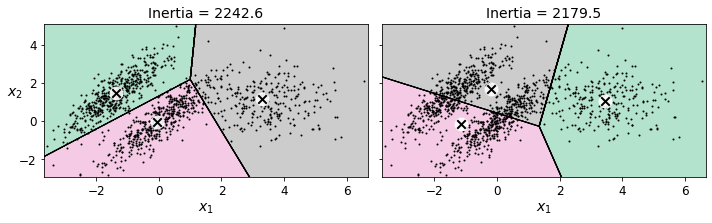

*타원형 군집은 가우시안 혼합 모델이 잘 작동*

#### **9.1.3 군집을 사용한 이미지 분할**

이미지 분할 - 이미지를 segment 여러 개로 분할하는 작업

ex) 색상 분할 - 동일한 색상을 가진 픽셀을 같은 segment에 할당

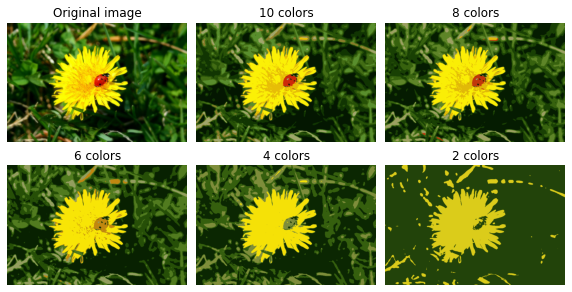

k-평균 알고리즘의 비슷한 크기의 군집을 만드는 경향 때문에 무당벌레가 주위 색에 합쳐짐

#### **9.1.4 군집을 사용한 전처리**

지도 학습 알고리즘 적용 전 전처리 단계로 사용 가능

ex) 흑백 이미지 데이터셋 차원 축소

- 군집 개수 50개 지정

  => 차원의 개수 : 64 -> 50

  => 각각의 이미지들을 클러스터까지의 거리로 바꾸어 Clustering

  => 데이터셋의 선형성 증가 
  
  => 로지스틱 회귀 성능 증가

  - 최적의 군집 개수를 찾기 위해 GridSearch를 사용
  

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 10))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.3s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.4s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.4s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.3s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.3s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.4s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.4s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.4s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.4s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.5s
[CV] END ...............................kmeans__n

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=42)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(2, 10)}, verbose=2)

In [ ]:
grid_clf.best_params_

{'kmeans__n_clusters': 9}

#### **9.1.5 군집을 사용한 준지도 학습**


- 데이터셋을 Clustering한 후 나타난 대표 이미지들을 수동으로 레이블로 지정해 사용

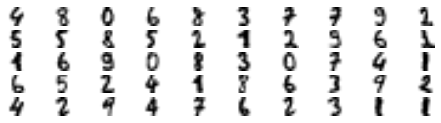

각 군집의 대표 이미지 - 해당 군집의 센트로이드까지의 거리가 가장 가까운 샘플

In [ ]:
test_labels = np.array([
    0, 1, 3, 2, 7, 6, 4, 6, 9, 5,
    1, 2, 9, 5, 2, 7, 8, 1, 8, 6,
    3, 1, 5, 4, 5, 4, 0, 3, 2, 6,
    1, 7, 7, 9, 1, 8, 6, 5, 4, 8,
    5, 3, 3, 6, 7, 9, 7, 8, 4, 9])

##### **레이블 전파** : 위 레이블을 동일한 군집에 있는 모든 샘플로 전파

In [ ]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)       # 데이터셋 크기만큼 Numpy 배열 생성

for i in range(k):                                                # 군집의 개수 k
    y_train_propagated[kmeans.labels_==i] = test_labels[i]        # 각 샘플에 레이블 할당

군집의 경계에 가깝게 위치한 샘플에 잘못 레이블이 부여되었을 가능성

  => 센트로이드와 가까운 샘플에만 전파하여 훈련

##### **능동학습**

알고리즘과 전문가의 상호작용을 통한 학습법

1. 레이블링된 샘플로 모델 훈련
2. 훈련된 모델을 이용하여 레이블링되지 않은 모든 샘플에 대해 예측
3. *불확실하게 예측한 샘플을 전문가가 레이블링
4. 레이블을 부여하는 노력만큼의 성능 향상이 되지 않을 때까지 1~3 반복


  *모델을 가장 크게 바꾸는 샘플, 검증 점수를 가장 크게 떨어뜨리는 샘플, 여러 개의 모델이 동일한 예측을 내지 않는 샘플에 적용 가능

#### **9.1.6 DBSCAN**

밀집된 연속적 지역을 군집으로 정의

충분히 밀집되어 있고 밀집되지 않은 지역과 잘 구분될 때 좋은 성능

##### **DBSCAN 알고리즘의 작동 방식**

1. 각 샘플에서 작은 거리 ε 내에 샘플이 몇 개 놓여 있는지 확인, 이 지역은 샘플의 ε-이웃이라 불림

2. ε-이웃 내에 적어도 min_samples개 샘플이 있다면 핵심 샘플(밀집된 지역에 있는 샘플)로 간주

  *min_samples - 최소 샘플 수(하이퍼파라미터)

3. 핵심 샘플의 이웃의 이웃을 계속해서 하나의 군집으로 형성

4. 핵심 샘플도 아니고 이웃도 아닌 샘플은 이상치로 판단 (레이블 -1로 표현)

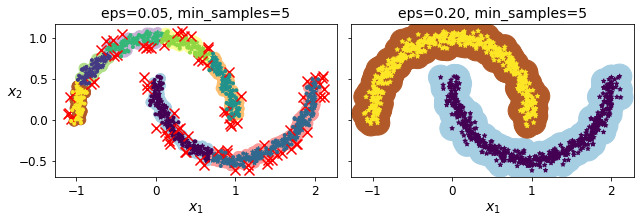

eps(이웃의 범위)를 증가 시켜 완벽한 군집을 얻은 오른쪽 그래프

#### **9.1.7 다른 군집 알고리즘**

- 병합 군집 - 군집 계츨을 밑바닥부터 위로 쌓아 구성

- BIRCH - 대규모 데이터셋을 위해 고안

- 평균-이동 - 지역의 최대 밀도를 찾을 때까지 높은 쪽으로 원을 이동, 원에 있는 모든 샘플을 동일한 군집으로 처리

- 유사도 전파 - 자신을 대표할 수 있는 비슷한 샘플에 투표, 각 대표와 투표한 샘플이 군집 형성. 크기가 다른 여러 개의 군집 감지 가능

- 스펙트럼 군집 - 복잡한 군집 구조 감지, 그래프 컷을 찾는데 사용

## **9.2 가우시안 혼합 Gaussian Mixture Model (GMM)**

샘플이 파라미터가 알려지지 않은 여러 개의 혼합된 가우시안 분포에서 생성되었다고 가정하는 확률 모델

하나의 가우시안 분포에서 생성된 모든 샘플은 하나의 군집을 형성 (일반적으로 타원형)

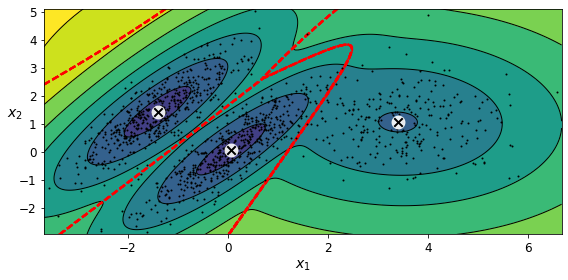

#### **9.2.1 가우시안 혼합을 사용한 이상치 탐지**

밀도가 낮은 지역에 있는 모든 샘플을 이상치로 판단
<br><br>
ex) 밀도 임계값을 4%로 설정하여 이상치를 구분

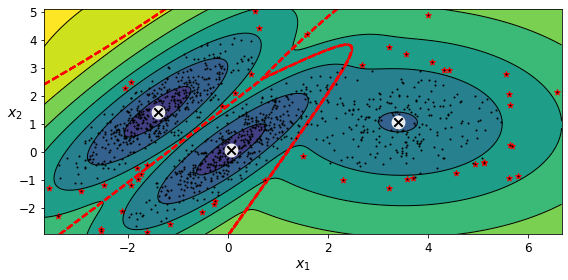

\* 모양 - 이상치


가우시안 혼합 모델은 이상치를 포함해서 모든 데이터에 맞추려 함.

=> 이상치가 많으면 모델이 정상치를 바라보는 시각이 편향되고 일부 이상치를 정상으로 잘못 생각할 수 있음

==> 한 모델을 훈련하고 가장 크게 벗어난 이상치를 제거, 정제된 데이터셋에서 모델을 다시 훈련

#### **9.2.2 군집 개수 선택하기**

가우시안 혼합은 군집이 타원형이거나 크기가 다르기 때문에 이너셔나 실루엣 점수를 사용해서 군집 개수를 선택 X

##### **BIC, AIC 성능지표**

학습할 파라미터가 많은(클러스터가 많은) 모델에게 벌칙을 가하고 데이터에 잘 학습하는 모델에게 보상을 더함

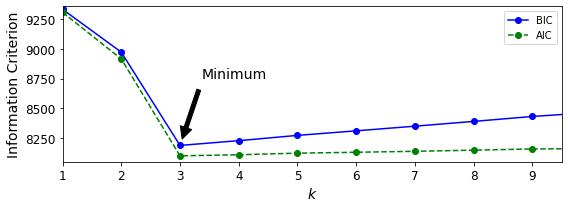

#### **9.2.3 베이즈 가우시안 혼합 모델**

최적의 군집 개수를 수동으로 찾지 않고 불필요한 군집의 가중치를 0으로 만드는 방식




In [10]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42) 
                            # n_component - 최적의 군집 개수 보다 크다고 믿을 만한 값

bgm.fit(X)

np.round(bgm.weights_, 2)   # 3개의 군집 감지

array([0.4 , 0.21, 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

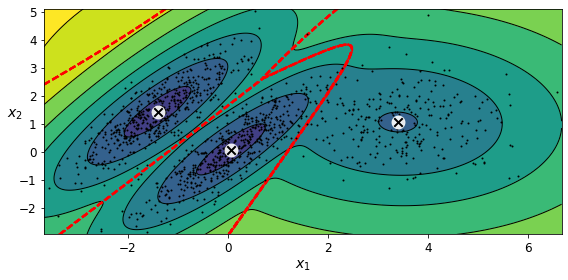

가우시안 혼합 모델을 타원형이 아닌 군집에 적용

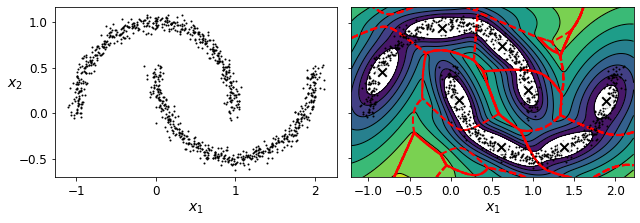

#### **9.2.4 이상치 탐지와 특이치 탐지를 위한 다른 알고리즘**

* PCA - 기존에 사영했던 것을 다시 복원하여 기존의 값과 많이 차이가 많이 나면 이상치로 간주

* Fast-MCD - 이상치 감지에 유용, 데이터셋을 정제할 때 사용

* Isolation-Forest - 고차원 데이터셋에서 이상치 감지에 효율적

* LOF - 이상치 탐지에 유용

* one-class SVM - 특이치 탐지에 유용